<a href="https://colab.research.google.com/github/newguy7/DataScienceProjects/blob/main/student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset

df = pd.read_csv('Student_Performance.csv')

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.shape

(10000, 6)

In [5]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 10000 rows and 6 columns.


##Data Checks to Perform

*   Check Missing values
*   Check data type
*   Check statistics of dataset
*   Check various categories present in the different categorical column


In [6]:
# checking missing values
df.isna().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


### There are no any missing values in the dataset

In [7]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [8]:
# check statistics
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [9]:
df.describe(include='object')

,Extracurricular Activities
count,10000
unique,2
top,No
freq,5052


## Study Patterns and Performance Analysis (Summary)

### Hours Studied:
  - Students typically student around 5 hours per day
  - ranges from 1 hr(min) to 9 hrs(max)
  - 50% of students study 5 hours or less

### Previous Scores
  - The average score is 69.4, but the scores varies from 40 to 99.
  - Half of the students score 69 or below  

### Sleep Hours
  - On average, students sleep about 6.5 hours per night.
  - Most students sleep between 4(min) to 9(max) hours.

### Sample Question Papers Practiced
  - On average, students practice around 4.6 sample papers.
  - 50% of students practiced atmost 5 papers.

### Performance Index
  - Students generally perform around 55% on their performance index.
  - The performance varies from 10% to 100%.
  - Half of the student scores 55 or less.     



### Check various categories present in the different categorical column

In [10]:
# Define Numerical and Categorical Columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [11]:
print("We have {} numerical features : {}".format(len(numeric_features),numeric_features))
print("\nWe have {} categorical features : {}\n".format(len(categorical_features), categorical_features))

df.head(n=2)

We have 5 numerical features : ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']

We have 1 categorical features : ['Extracurricular Activities']



,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0


## Exploring Data (Visualization)

In [12]:
df_hours_studied = df['Hours Studied'].value_counts().sort_index()
df_hours_studied

,count
Hours Studied,
1,1152
2,1085
3,1119
4,1085
5,1094
6,1133
7,1129
8,1088
9,1115


In [13]:
def add_labels(x, y):
    for k in range(len(x)):
        plt.text(k, y[k], str(y[k]), ha='center', va='bottom')

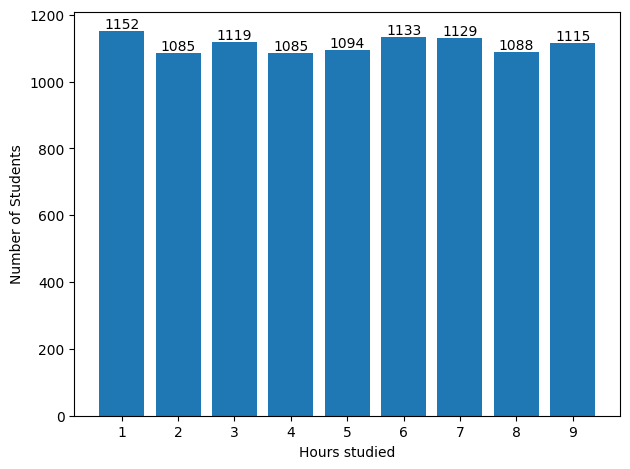

In [14]:
#Create a bar chart
plt.bar(range(len(df_hours_studied.index)),df_hours_studied.values)

add_labels(range(len(df_hours_studied.index)), df_hours_studied.values)

plt.xticks(range(len(df_hours_studied.index)), df_hours_studied.index)

plt.xlabel('Hours studied')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

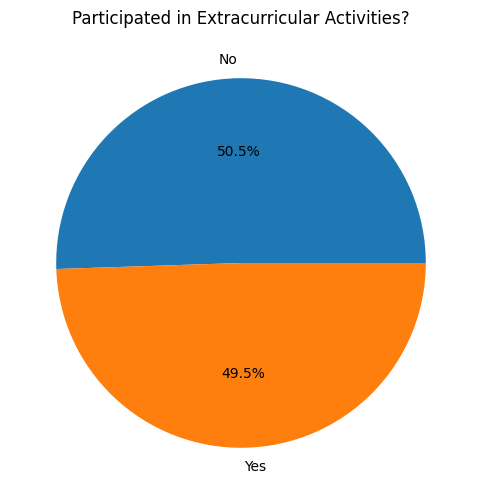

In [15]:
# Extracurricular Activities
extracurricular_df = df['Extracurricular Activities'].value_counts()

# Pie chart
plt.figure(figsize=(8, 6))
extracurricular_df.plot(kind='pie', autopct='%1.1f%%')
plt.title('Participated in Extracurricular Activities?')
plt.ylabel('')
plt.show()

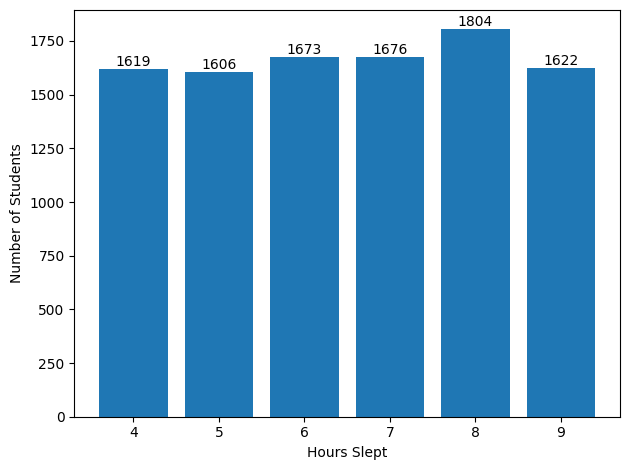

In [16]:
# Sleep Hours
sleep_df = df['Sleep Hours'].value_counts().sort_index()
sleep_df

# Create a bar chart
# Use the range for x-axis to align with labels
plt.bar(range(len(sleep_df.index)), sleep_df.values)
add_labels(range(len(sleep_df.index)), sleep_df.values)
# Correct the x-tick labels to match sleep hours
plt.xticks(range(len(sleep_df.index)), sleep_df.index)
plt.xlabel('Hours Slept')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

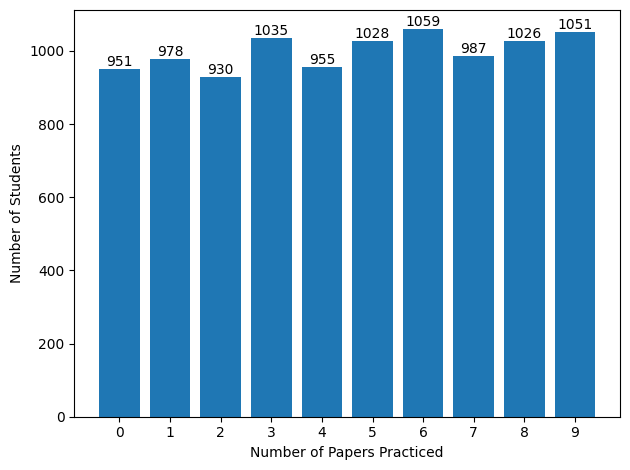

In [17]:
# Sample Question Papers Practiced
sample_question_df = df['Sample Question Papers Practiced'].value_counts().sort_index()

# create bar chart
plt.bar(range(len(sample_question_df.index)),sample_question_df.values)
add_labels(range(len(sample_question_df.index)), sample_question_df.values)

plt.xticks(range(len(sample_question_df.index)),sample_question_df.index)
plt.xlabel('Number of Papers Practiced')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

In [18]:
#correlation between performance indicator and all the factors
import seaborn as sns
import numpy as np

In [20]:
# Convert 'Extracurricular Activities' to numerical values for easier comparison
ECA_mapping = {'No': 2, 'Yes': 1}
df['Extracurricular Activities(Numeric)'] = df['Extracurricular Activities'].map(ECA_mapping)

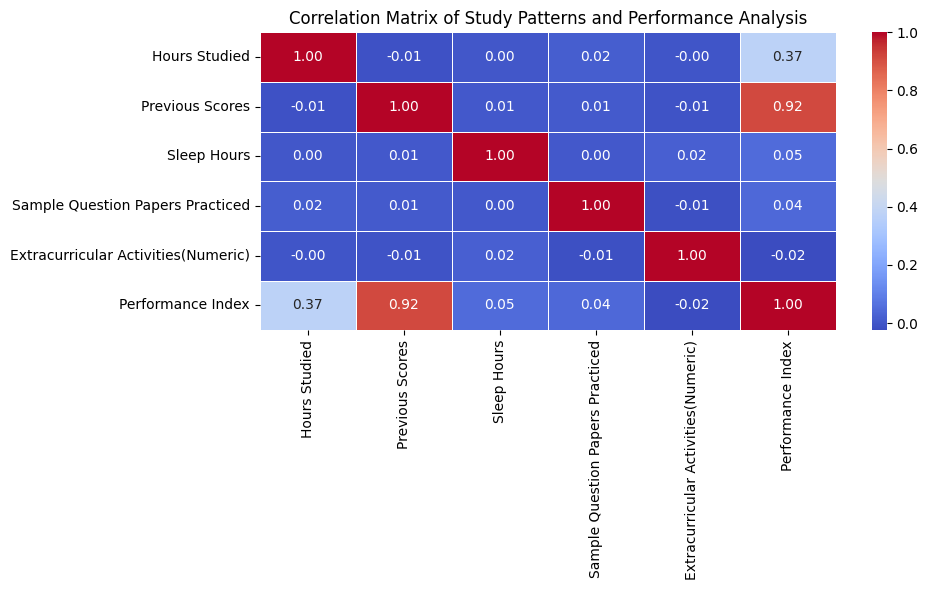

In [22]:
# Creating a DataFrame for correlations between all habits and cancer probability
correlation_matrix = df[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Extracurricular Activities(Numeric)','Performance Index']].corr()

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix of Study Patterns and Performance Analysis')
plt.tight_layout()
plt.show()

##Study Patterns and Their Impact on Performance Indicator:

<b>Previous Scores</b>: There is a strong positive correlation of 0.92 between previous scores and current performance. This indicates that a student's prior academic achievements are a highly reliable predictor of their future performance.

<b>Hours Studied</b>: The correlation between hours studied and performance is 0.37, showing a weak positive correlation. While more hours of study contribute to better performance, the impact is relatively modest.

<b>Sleep Hours</b>: The correlation between sleep hours and performance is 0.05, which reflects a very weak positive correlation. This suggests that sleep has minimal direct influence on student performance.

<b>Sample Question Papers Practiced</b>: The correlation here is 0.04, indicating another weak positive correlation. Practicing sample papers has a slight, almost negligible, effect on improving performance.

<b>Extra-Curricular Activities</b>: There is a weak negative correlation of −0.02 between participation in extra-curricular activities and performance. While the impact is small, it suggests that increased involvement in such activities may slightly detract from academic performance.

###Conclusion:
The analysis highlights that <b>previous academic performance</b> is the most significant factor in predicting current performance, while hours studied, sleep, and sample paper practice have limited influence. Participation in extra-curricular activities shows a minor negative impact, though the effect is minimal. These insights can inform future strategies for optimizing student performance by focusing on academic consistency and balancing non-academic activities.


In [26]:
# Splitting Features and Label

# Label Data
Y = df['Performance Index']

# Features Data
X = df.drop(['Performance Index','Extracurricular Activities(Numeric)'],axis=1)
#features_cols = X.columns

In [29]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [31]:
num_features

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced'],
      dtype='object')

In [32]:
cat_features

Index(['Extracurricular Activities'], dtype='object')

In [33]:
# Data Preprocessing (Scaling)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
oh_encoder = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_encoder, cat_features),
         ("StandardScaler", scaler, num_features),
    ]
)

In [34]:
X = preprocessor.fit_transform(X)

In [36]:
X.shape

(10000, 6)

In [37]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((8000, 6), (2000, 6))

In [38]:
# pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.3 MB/s eta 0:00:00


In [39]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

#### Create an Evaluate Function to give all metrics after model Training

In [40]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [41]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [42]:
model_list = []
r2_list =[]

for i in range(len(list(models))):
  model = list(models.values())[i]

  #Train the model
  model.fit(X_train,y_train)

  #Make prediction
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  #Evaluate Train and Test dataset
  model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

  model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

  print(list(models.keys())[i])
  model_list.append(list(models.keys())[i])

  print('Model performance for Training set')
  print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
  print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
  print("- R2 Score: {:.4f}".format(model_train_r2))

  print('----------------------------------')

  print('Model performance for Test set')
  print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
  print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
  print("- R2 Score: {:.4f}".format(model_test_r2))
  r2_list.append(model_test_r2)

  print('='*35)
  print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 2.0421
- Mean Absolute Error: 1.6193
- R2 Score: 0.9887
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.0205
- Mean Absolute Error: 1.6112
- R2 Score: 0.9890


Lasso
Model performance for Training set
- Root Mean Squared Error: 2.6883
- Mean Absolute Error: 2.1509
- R2 Score: 0.9804
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.7409
- Mean Absolute Error: 2.1678
- R2 Score: 0.9797


Ridge
Model performance for Training set
- Root Mean Squared Error: 2.0420
- Mean Absolute Error: 1.6193
- R2 Score: 0.9887
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.0207
- Mean Absolute Error: 1.6112
- R2 Score: 0.9890


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2.4220
- Mean Absolute Error: 1.9404
- R2 Score: 0.9841
-----------------------

In [43]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.988984
2,Ridge,0.988982
7,CatBoosting Regressor,0.988382
6,XGBRegressor,0.986711
5,Random Forest Regressor,0.986073
1,Lasso,0.979728
8,AdaBoost Regressor,0.977417
3,K-Neighbors Regressor,0.977010
4,Decision Tree,0.975906


### Using Linear Regressor

In [44]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 98.90


#### Difference between Actual and Predicted Values

In [45]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':np.round(y_pred,2),'Difference':y_test-np.round(y_pred,2)})
pred_df

,Actual Value,Predicted Value,Difference
6252,51.0,54.70,-3.70
4684,20.0,22.63,-2.63
1731,46.0,47.92,-1.92
4742,28.0,31.30,-3.30
4521,41.0,42.99,-1.99
...,...,...,...
6412,45.0,46.87,-1.87
8285,66.0,62.69,3.31
7853,16.0,16.80,-0.80
1095,65.0,63.33,1.67


##Using Ridge

In [46]:
# Initialize the Ridge model
ridge_model = Ridge(alpha=0.1)

# Train the model
ridge_model = ridge_model.fit(X_train,y_train)

# Make predictions on the test data
y_pred = ridge_model.predict(X_test)

# Calculate the R-squared score (accuracy)
score = r2_score(y_test, y_pred) * 100

# Print the accuracy of the model
print("Accuracy of the model is %.2f%%" % score)

Accuracy of the model is 98.90%


#### Difference between Actual and Predicted Values

In [47]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':np.round(y_pred,2),'Difference':y_test-np.round(y_pred,2)})
pred_df

,Actual Value,Predicted Value,Difference
6252,51.0,54.71,-3.71
4684,20.0,22.62,-2.62
1731,46.0,47.90,-1.90
4742,28.0,31.29,-3.29
4521,41.0,43.00,-2.00
...,...,...,...
6412,45.0,46.89,-1.89
8285,66.0,62.70,3.30
7853,16.0,16.79,-0.79
1095,65.0,63.34,1.66
